M2780.002400 Machine Listening (Fall 2020)

Instructor: Kyogu Lee (kglee@snu.ac.kr)

# Assignment 6: Neural Networks

(100 points)

**Due Date : This assignment is due by 12:59PM, October 20 (Tuesday)**


---

Assignment

Each assignment is composed of two parts: a) in the theory part, you are required to solve the problem set, write down your answers on paper (also, typing your answers using PC or tablet PC is fine), and upload the scanned version (**아무개_hw6.pdf**) via **ETL**; b) for the lab assignment, you will need to write Notebook scripts (**아무개_hw6.ipynb**) and/or functions as required and submit them electronically (via **ETL**) by the end of the due date.

# Theory (50 pts)


---



1.   Model Representation (10 pts)


 Suppose you want to train the digit classifier using a simple neural network (i.e. the number of output nodes is 10). The input is a square gray image with 100 pixels. (i.e. (10x10) for one image). If your network has only one hidden layer with 50 nodes, how many parameters will be updated in the training phase (HINT: do not forget the bias node)?



---



2.   Feedforward Propagation (10 pts)


 You are using the neural network pictured below and have learned the parameters $\Theta^{(1)} = \begin{bmatrix}
    1 & 2.1 & 1.3 \\
    1 & 0.6 & -1.2 \\
\end{bmatrix}$ (used to compute $a^{(3)}$) and $\Theta^{(2)} = \begin{bmatrix}
    1 & 4.5 & 3.1 \\
\end{bmatrix}$  (used to compute $a^{(3)}$, as function of $a^{(2)}$). Suppose you swap the parameters for the first hidden layer between its two units. So  $\Theta^{(1)} = \begin{bmatrix}
    1 & 0.6 & -1.2 \\
    1 & 2.1 & 1.3 \\
\end{bmatrix}$and $\Theta^{(2)} = \begin{bmatrix}
    1 & 4.5 & 3.1 \\
\end{bmatrix}$. How will this change the value of the output $h_{\Theta}(x)$ ? 


 
![](https://gdurl.com/dAiN)





*   a. It will decrease
*   b. It will increase
*   c. It will stay same
*   d. Insufficient information to tell: it may increase or decrease





---



3.   Back Propagation (10 pts)


 When training the neural networks, what are the typical steps for using a gradient descent algorithm?

1) Compute the error between the actual value and the predicted value

2) Reiterate until you find the best weights of network (until the error is sufficiently small)

3) Pass an input through the network and get values from output layer

4) Initialize random weight and bias

5) Go to each neuron which contributes to the error and change its respective values to reduce the error




*   a. 1 ➜ 2 ➜ 3 ➜ 4 ➜ 5
*   b. 5 ➜ 4 ➜ 3 ➜ 2 ➜ 1
*   c. 3 ➜ 2 ➜ 1 ➜ 5 ➜ 4
*   d. 4 ➜ 3 ➜ 1 ➜ 5 ➜ 2




---



4.   Gradient Computation (20 pts)

Given a quadratic cost function


$J(\Theta) = \frac{1}{2}\sum_{k \in K} ((h_{\Theta}(x))_{k} - y_{k})^{2} $


and "error" of cost for $a_{j}^{(l)}$ (unit $j$ in layer $l$)


$\delta_{j}^{(l)} = \frac{\partial }{\partial z_{j}^{(l)}} J(\Theta)$


drive the following equations:


\\



a) $\delta^{(L)} = (a^{(L)} - y).*g^{'}(z^{(L)})$

b) $\delta^{(l)} = (\Theta^{(l)})^{T} \delta^{(l+1)}.*g^{'}(z^{(l)})$

c) $\frac{\partial}{\partial \Theta_{ij}^{(l)}} J(\Theta) = a_{j}^{(l)} \delta_{i}^{l+1}$





---



5.   (optional) Gradient Computation (20 pts)

 Repeat Problem 4 for the cross-entropy cost function.


---



6.   (optional) Convexity of Cost Functions (20 pts)


Assume we use a sigmoid function for output layer activation in Neural Network; i.e. $a_L = g_L (z_L) = \frac{1}{1 + e^{-zL}}$, Prove that the cross-entropy loss function is convex (hint: for a convex function $f(x),f^{''}(x)=\frac{d^2f}{dx^2} \geq 0, \forall x \in \mathbb{R}$.

# Lab (50pts)

For all lab assignments, submit your Notebook file (**아무개_hw6.ipynb**) via **ETL**. The Notebook file should be named with your full name and the homework number – e.g., **아무개_hw6.ipynb**. 

In addition to writing Python scripts and/or functions in your Notebook file, there are also questions you’ll have to answer. For such questions, you should provide answers in your Notebook file using Text sections.

**Please submit the codes executed (make sure that the results of your codes are visible in the submitted assignments) so that the grader can check whether the code is working or not.**


1.   binary MNIST from Scratch (30 pts)

Choose two digits from the MNIST handwriting data. Make a subset of the MNIST dataset containing only the chosen two digits. Separate the dataset to training and testing data. The ratio of the training and testing data should be 6 to 1. Make and train a neural network from scratch. Use the code provided by lab6 and expand the network to have three hidden layers. The number of input nodes should be 784 (28X28) and the number of output nodes should be 2 (0, 1 binary one hot vector). The number of nodes for the hidden layers should be scalable. The activation function for the last layer (output layer) should be sigmoid and the activation for the rest of the network should be relu. Plot the cost and the confusion matrix of your trained model.

### lab6의 코드가 조금 불편해서 from scratch로 처음부터 다시 짰습니다.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Download Mnist

from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
# Choose class '0', and '1'

X_train_subset = X_train[np.logical_or(Y_train == 0, Y_train == 1),:,:]
Y_train_subset = Y_train[np.logical_or(Y_train == 0, Y_train == 1)]

X_test_subset = X_test[np.logical_or(Y_test == 0, Y_test == 1),:,:]
Y_test_subset = Y_test[np.logical_or(Y_test == 0, Y_test == 1)]

X_train_subset = X_train_subset.reshape(-1, 784)
X_test_subset = X_test_subset.reshape(-1, 784)
X_train_subset = X_train_subset.astype('float32')
X_test_subset = X_test_subset.astype('float32')
X_train_subset /= 255
X_test_subset /= 255

y_train_all = []
for item in Y_train_subset:
    y_train_all.append(np.eye(2)[item])
y_train_all = np.asarray(y_train_all)

y_test_all = []
for item in Y_test_subset:
    y_test_all.append(np.eye(2)[item])
y_test_all = np.asarray(y_test_all)

In [5]:
print("ratio : {}".format(y_train_all.shape[0] / y_test_all.shape[0]))

ratio : 5.988179669030733


In [6]:
num_examples = y_train_all.shape[0] # training set size
nn_input_dim = 784 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [7]:
loss = []

def ReLU(x):
    return np.maximum(0,x)

def calculate_loss(model):
    W1, b1, W2, b2, W3, b3, W4, b4 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'], model['W4'], model['b4']
    # Forward propagation to calculate our predictions
    z1 = X_train_subset.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W3) + b3
    a3 = np.tanh(z3)
    z4 = a3.dot(W4) + b4
    exp_scores = np.exp(z4)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log([probs[i,np.nonzero(y_train_all)[(1)][i].astype('int64')] for i in range(num_examples)])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

def predict(model, x):
    W1, b1, W2, b2, W3, b3, W4, b4 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'], model['W4'], model['b4']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W3) + b3
    a3 = np.tanh(z3)
    z4 = a3.dot(W4) + b4
    exp_scores = np.exp(z4)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

def calculate_accuracy(model):
    predicted = predict(model, X_test_subset)
    correct = 0
    for i in range(y_test_all.shape[0]):
        if y_test_all[i][predicted[i]] != 0:
            correct += 1 
    print('Test accuracy : {}%'.format(100.*correct/y_test_all.shape[0]))
    
def build_model(nn_hdim_1, nn_hdim_2, nn_hdim_3, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim_1) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim_1))
    W2 = np.random.randn(nn_hdim_1, nn_hdim_2) / np.sqrt(nn_hdim_1)
    b2 = np.zeros((1, nn_hdim_2))
    W3 = np.random.randn(nn_hdim_2, nn_hdim_3) / np.sqrt(nn_hdim_2)
    b3 = np.zeros((1, nn_hdim_3))
    W4 = np.random.randn(nn_hdim_3, nn_output_dim) / np.sqrt(nn_hdim_3)
    b4 = np.zeros((1, nn_output_dim))

    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X_train_subset.dot(W1) + b1
        a1 = ReLU(z1)
        z2 = a1.dot(W2) + b2
        a2 = ReLU(z2)
        z3 = a2.dot(W3) + b3
        a3 = ReLU(z3)
        z4 = a3.dot(W4) + b4
        exp_scores = np.exp(z4)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta5 = (probs - y_train_all) / y_train_all.shape[0]
        
        dW4 = (a3.T).dot(delta5)
        db4 = np.sum(delta5, axis=0, keepdims=True)
        delta4 = delta5.dot(W4.T) * (1 - np.power(a3, 2))
        
        dW3 = np.dot(z2.T, delta4)
        db3 = np.sum(delta4, axis=0, keepdims=True)
        delta3 = delta4.dot(W3.T) * (1 - np.power(a2, 2))
        
        dW2 = np.dot(z1.T, delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        
        dW1 = np.dot(X_train_subset.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms
        dW4 += reg_lambda * W4
        dW3 += reg_lambda * W3
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        W3 += -epsilon * dW3
        b3 += -epsilon * db3
        W4 += -epsilon * dW4
        b4 += -epsilon * db4
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3, 'W4': W4, 'b4': b4}
        
        if i % 10 == 0:
            loss.append(calculate_loss(model))
        
        if print_loss and i == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
        if print_loss and i % 100 == 99:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

In [8]:
model = build_model(128, 128, 128, num_passes=300, print_loss=True)

Loss after iteration 0: 0.692312
Loss after iteration 99: 0.013810
Loss after iteration 199: 0.015686
Loss after iteration 299: 0.015919


In [9]:
calculate_accuracy(model)

Test accuracy : 99.8581560283688%


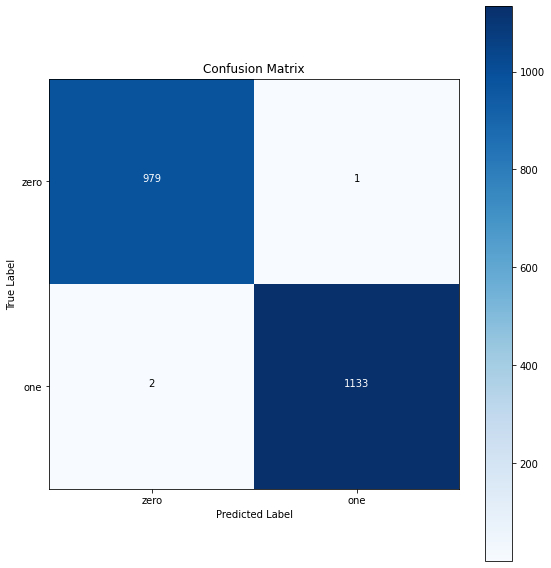

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
y_pred = predict(model, X_test_subset)
y_gt = np.argmax(y_test_all)
y_gt = np.argmax(y_test_all, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['zero', 'one'])
plt.yticks(tick_marks, ['zero', 'one'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()

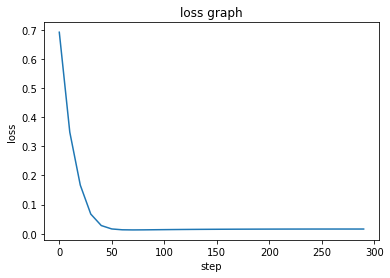

In [11]:
step = np.arange(30) * 10
plt.plot(step, loss)
plt.title("loss graph")
plt.xlabel('step')
plt.ylabel('loss')
plt.show()


---


2.   binary MNIST using keras (10 pts)

Use the dataset created at lab problem 1. Make and train a neural network model resembling the neural network model used at lab problem 1 using keras. Verify your network by comparing the accuracy with the result from lab problem 1.

In [150]:
input_dim = 784
nn_hdim_1 = 128
nn_hdim_2 = 128
nn_hdim_3 = 128
output_dim = 2

In [151]:
model = Sequential()     
model.add(Dense(nn_hdim_1, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(nn_hdim_2, input_dim=nn_hdim_1))
model.add(Activation('relu'))
model.add(Dense(nn_hdim_3, input_dim=nn_hdim_2))
model.add(Activation('relu'))
model.add(Dense(output_dim, input_dim=nn_hdim_3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')


In [153]:
model.fit(X_train_subset, y_train_all, batch_size=32, epochs=300, verbose=1)

Epoch 1/300
396/396 [==============================] - 0s 580us/step - loss: 0.6996 - accuracy: 0.4316
Epoch 2/300
396/396 [==============================] - 0s 571us/step - loss: 0.6429 - accuracy: 0.5222
Epoch 3/300
396/396 [==============================] - 0s 555us/step - loss: 0.5865 - accuracy: 0.6641
Epoch 4/300
396/396 [==============================] - 0s 601us/step - loss: 0.5304 - accuracy: 0.8036
Epoch 5/300
396/396 [==============================] - 0s 558us/step - loss: 0.4747 - accuracy: 0.9033
Epoch 6/300
396/396 [==============================] - 0s 615us/step - loss: 0.4202 - accuracy: 0.9545
Epoch 7/300
396/396 [==============================] - 0s 583us/step - loss: 0.3672 - accuracy: 0.9774
Epoch 8/300
396/396 [==============================] - 0s 561us/step - loss: 0.3160 - accuracy: 0.9870
Epoch 9/300
396/396 [==============================] - 0s 563us/step - loss: 0.2672 - accuracy: 0.9912
Epoch 10/300
396/396 [==============================] - 0s 553us/step - l

396/396 [==============================] - 0s 586us/step - loss: 0.0052 - accuracy: 0.9986
Epoch 158/300
396/396 [==============================] - 0s 596us/step - loss: 0.0052 - accuracy: 0.9986
Epoch 159/300
396/396 [==============================] - 0s 577us/step - loss: 0.0052 - accuracy: 0.9986
Epoch 160/300
396/396 [==============================] - 0s 574us/step - loss: 0.0052 - accuracy: 0.9986
Epoch 161/300
396/396 [==============================] - 0s 574us/step - loss: 0.0051 - accuracy: 0.9986
Epoch 162/300
396/396 [==============================] - 0s 600us/step - loss: 0.0051 - accuracy: 0.9986
Epoch 163/300
396/396 [==============================] - 0s 547us/step - loss: 0.0051 - accuracy: 0.9986
Epoch 164/300
396/396 [==============================] - 0s 564us/step - loss: 0.0051 - accuracy: 0.9986
Epoch 165/300
396/396 [==============================] - 0s 622us/step - loss: 0.0051 - accuracy: 0.9986
Epoch 166/300
396/396 [==============================] - 0s 585us/ste

In [154]:
score = model.evaluate(X_test_subset, y_test_all, verbose=1)
print('\n''Test accuracy:', score[1])

67/67 [==============================] - 0s 407us/step - loss: 0.0023 - accuracy: 0.9991

Test accuracy: 0.9990543723106384


### 둘 다 비슷한 정확도를 보여주었습니다.


---


3.   MNIST using keras  (10 pts)


Refer to the lab6 materials to create and learn a neural network that classifies MNIST handwriting data and organize the results using keras. Change the number of layers, number of neurons, and activation functions and experiment with three different settings and verify the accuracy of over the test data. Draw a confusion matrix of the most accurate model.

In [156]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

In [174]:
batch_size = 128
epochs = 50

In [175]:
# model 1 : activation with tanh layers

input_dim=784
nn_hdim_1 = 512
nn_hdim_2 = 256
nn_hdim_3 = 128
output_dim = 10

model_1 = Sequential()
model_1.add(Dense(nn_hdim_1, input_dim=input_dim))
model_1.add(Activation('tanh'))
model_1.add(Dense(nn_hdim_2, input_dim=nn_hdim_1))
model_1.add(Activation('tanh'))
model_1.add(Dense(nn_hdim_3, input_dim=nn_hdim_2))
model_1.add(Activation('tanh'))
model_1.add(Dense(output_dim, input_dim=nn_hdim_3))
model_1.add(Activation('softmax'))

model_1.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

In [176]:
model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/50
469/469 [==============================] - 1s 2ms/step - loss: 2.1976 - accuracy: 0.2007
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 1.8380 - accuracy: 0.5102
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 1.5469 - accuracy: 0.6598
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 1.3217 - accuracy: 0.7225
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 1.1512 - accuracy: 0.7581
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 1.0222 - accuracy: 0.7812
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.9233 - accuracy: 0.7982
Epoch 8/50
469/469 [==============================] - 1s 2ms/step - loss: 0.8458 - accuracy: 0.8119
Epoch 9/50
469/469 [==============================] - 1s 2ms/step - loss: 0.7845 - accuracy: 0.8223
Epoch 10/50
469/469 [==============================] - 1s 2ms/step - loss: 0.7347 - accuracy: 0.8305

In [177]:
score = model_1.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 593us/step - loss: 0.3341 - accuracy: 0.9092

Test accuracy: 0.9092000126838684


In [178]:
# model 2 : activation with ReLU layers
input_dim=784
nn_hdim_1 = 512
nn_hdim_2 = 256
nn_hdim_3 = 128
output_dim = 10

model_2 = Sequential()
model_2.add(Dense(nn_hdim_1, input_dim=input_dim))
model_2.add(Activation('relu'))
model_2.add(Dense(nn_hdim_2, input_dim=nn_hdim_1))
model_2.add(Activation('relu'))
model_2.add(Dense(nn_hdim_3, input_dim=nn_hdim_2))
model_2.add(Activation('relu'))
model_2.add(Dense(output_dim, input_dim=nn_hdim_3))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

In [179]:
model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/50
469/469 [==============================] - 1s 2ms/step - loss: 2.2578 - accuracy: 0.1223
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 2.1564 - accuracy: 0.3128
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 2.0473 - accuracy: 0.5053
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 1.9284 - accuracy: 0.5990
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 1.8025 - accuracy: 0.6533
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 1.6738 - accuracy: 0.6929
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 1.5458 - accuracy: 0.7257
Epoch 8/50
469/469 [==============================] - 1s 2ms/step - loss: 1.4223 - accuracy: 0.7518
Epoch 9/50
469/469 [==============================] - 1s 2ms/step - loss: 1.3065 - accuracy: 0.7739
Epoch 10/50
469/469 [==============================] - 1s 2ms/step - loss: 1.1999 - accuracy: 0.7918

In [180]:
score = model_2.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 490us/step - loss: 0.3279 - accuracy: 0.9110

Test accuracy: 0.9110000133514404


In [ ]:
# model 3 : more layers and more neurons version of model 2

In [181]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 256
nn_hdim_4 = 64
output_dim = 10

model_3 = Sequential()
model_3.add(Dense(nn_hdim_1, input_dim=input_dim))
model_3.add(Activation('relu'))
model_3.add(Dense(nn_hdim_2, input_dim=nn_hdim_1))
model_3.add(Activation('relu'))
model_3.add(Dense(nn_hdim_3, input_dim=nn_hdim_2))
model_3.add(Activation('relu'))
model_3.add(Dense(nn_hdim_4, input_dim=nn_hdim_3))
model_3.add(Activation('relu'))
model_3.add(Dense(output_dim, input_dim=nn_hdim_4))
model_3.add(Activation('softmax'))

model_3.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

In [182]:
model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 2.2568 - accuracy: 0.1318
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 2.1469 - accuracy: 0.2202
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 2.0210 - accuracy: 0.3826
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 1.8778 - accuracy: 0.5512
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 1.7205 - accuracy: 0.6607
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 1.5565 - accuracy: 0.7290
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 1.3951 - accuracy: 0.7723
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 1.2438 - accuracy: 0.8015
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 1.1081 - accuracy: 0.8194
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.9917 - accuracy: 0.8313

In [183]:
score = model_3.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 918us/step - loss: 0.2798 - accuracy: 0.9212

Test accuracy: 0.9211999773979187


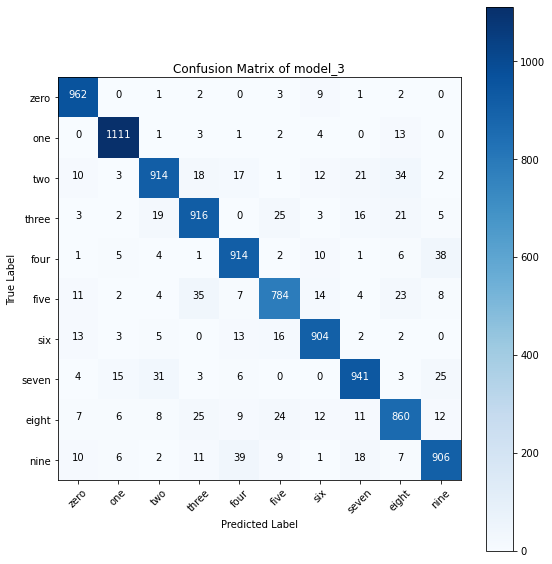

In [186]:
Y_pred = model_3.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model_3")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
